### Naive bayes 

Neste notebook será realizado a aplicação do modelo de naive bayes com dois tipos de word2vec, sendo o primeiro caso utilizando o modelo word2vec feito com o corpus do projeto e a segunda análise com o word2vec pré processado CBOW 50 dimensões" do site do NILC (http://nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc)

#### Importando as bibliotecas

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### Processando com o word2vec feito com o corpus

In [2]:
df_corpus = pd.read_csv('../base/word2vec_corpus.csv', index_col=0)

In [3]:
# Removendo NaN das bases para facilitar o treinamento 
df_without_NaN = df_corpus.dropna()


In [4]:
df_without_NaN

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.229108,-0.510641,-0.528357,-0.539646,0.044241,0.190616,-0.316812,-0.481302,0.292665,0.152631,...,-0.217320,0.257045,-0.196502,-0.181537,0.172708,0.030273,0.025029,-0.025549,-0.114576,1
['sim'],0.089359,-0.157706,-0.382467,-0.288154,0.271361,0.183616,-0.230013,-0.484156,0.108357,0.124014,...,-0.113931,0.239854,-0.082515,-0.234454,0.377608,0.313878,-0.051470,-0.175528,-0.107952,0
"['queria', 'saber', 'banking', 'própria']",0.158292,-0.292464,-0.463430,-0.300576,0.062400,0.158551,-0.287680,-0.415687,0.145777,0.153554,...,-0.176911,0.229033,-0.097036,-0.144796,0.198259,0.031119,-0.050245,-0.107662,-0.178710,1
[],-0.160157,-0.185960,-0.267293,-0.663145,0.534124,0.049555,-0.366273,-0.368948,-0.009452,0.023265,...,-0.304741,0.339400,-0.062100,-0.158935,0.561236,0.286643,-0.035090,-0.045580,-0.129499,0
"['palmas', 'palmas', 'palmas', 'palmas']",-0.144616,0.115510,-0.343944,-0.168015,0.167748,0.183836,-0.210945,-0.349912,0.088331,0.178799,...,-0.071575,0.274360,-0.139658,-0.171061,0.374716,0.410202,-0.115234,-0.254348,-0.283959,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.150476,-0.224858,-0.401872,-0.363306,-0.061161,0.087128,-0.236299,-0.357250,0.207029,0.034834,...,-0.129704,0.355330,-0.187999,-0.189261,0.096097,0.107697,-0.019012,-0.089640,-0.157856,1
"['porque', 'brg', 'tá', 'diminuído', 'limite', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.179826,-0.317970,-0.473730,-0.374198,0.065208,0.184645,-0.300025,-0.460253,0.236172,0.153765,...,-0.174083,0.272439,-0.138258,-0.220851,0.185414,0.097092,-0.032127,-0.093672,-0.174149,-1
"['atendam', 'telefone', 'amor', 'deus']",0.136935,-0.326340,-0.480037,-0.401130,0.043030,0.166945,-0.290695,-0.452460,0.257912,0.110724,...,-0.181774,0.259440,-0.182321,-0.225408,0.169600,0.115163,0.006588,-0.101710,-0.168454,1


#### Label encoding 

O label encoding é feito para permitir com que o modelo interprete os diferentes resultados da váriavel alvo.
Nesta etapa os labels retornam o seguinte resultado : 

- POSITIVO = 2

- NEUTRO = 1

- NEGATIVO = 0

In [5]:
le = preprocessing.LabelEncoder()

In [6]:
le.fit(df_without_NaN['sentimento'])
df_without_NaN['sentimento'] = le.transform(df_without_NaN['sentimento'])

In [7]:
# Demonstrando o resultado do label encoding
df_without_NaN

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.229108,-0.510641,-0.528357,-0.539646,0.044241,0.190616,-0.316812,-0.481302,0.292665,0.152631,...,-0.217320,0.257045,-0.196502,-0.181537,0.172708,0.030273,0.025029,-0.025549,-0.114576,2
['sim'],0.089359,-0.157706,-0.382467,-0.288154,0.271361,0.183616,-0.230013,-0.484156,0.108357,0.124014,...,-0.113931,0.239854,-0.082515,-0.234454,0.377608,0.313878,-0.051470,-0.175528,-0.107952,1
"['queria', 'saber', 'banking', 'própria']",0.158292,-0.292464,-0.463430,-0.300576,0.062400,0.158551,-0.287680,-0.415687,0.145777,0.153554,...,-0.176911,0.229033,-0.097036,-0.144796,0.198259,0.031119,-0.050245,-0.107662,-0.178710,2
[],-0.160157,-0.185960,-0.267293,-0.663145,0.534124,0.049555,-0.366273,-0.368948,-0.009452,0.023265,...,-0.304741,0.339400,-0.062100,-0.158935,0.561236,0.286643,-0.035090,-0.045580,-0.129499,1
"['palmas', 'palmas', 'palmas', 'palmas']",-0.144616,0.115510,-0.343944,-0.168015,0.167748,0.183836,-0.210945,-0.349912,0.088331,0.178799,...,-0.071575,0.274360,-0.139658,-0.171061,0.374716,0.410202,-0.115234,-0.254348,-0.283959,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.150476,-0.224858,-0.401872,-0.363306,-0.061161,0.087128,-0.236299,-0.357250,0.207029,0.034834,...,-0.129704,0.355330,-0.187999,-0.189261,0.096097,0.107697,-0.019012,-0.089640,-0.157856,2
"['porque', 'brg', 'tá', 'diminuído', 'limite', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.179826,-0.317970,-0.473730,-0.374198,0.065208,0.184645,-0.300025,-0.460253,0.236172,0.153765,...,-0.174083,0.272439,-0.138258,-0.220851,0.185414,0.097092,-0.032127,-0.093672,-0.174149,0
"['atendam', 'telefone', 'amor', 'deus']",0.136935,-0.326340,-0.480037,-0.401130,0.043030,0.166945,-0.290695,-0.452460,0.257912,0.110724,...,-0.181774,0.259440,-0.182321,-0.225408,0.169600,0.115163,0.006588,-0.101710,-0.168454,2


### Separando o dataset em treino e teste

O Dataset é necessário 

In [8]:
target_corpus = df_without_NaN['sentimento']

In [9]:
features_corpus = df_without_NaN.iloc[:,0:50]


In [10]:
features_corpus

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor41,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.229108,-0.510641,-0.528357,-0.539646,0.044241,0.190616,-0.316812,-0.481302,0.292665,0.152631,...,0.250459,-0.217320,0.257045,-0.196502,-0.181537,0.172708,0.030273,0.025029,-0.025549,-0.114576
['sim'],0.089359,-0.157706,-0.382467,-0.288154,0.271361,0.183616,-0.230013,-0.484156,0.108357,0.124014,...,0.305007,-0.113931,0.239854,-0.082515,-0.234454,0.377608,0.313878,-0.051470,-0.175528,-0.107952
"['queria', 'saber', 'banking', 'própria']",0.158292,-0.292464,-0.463430,-0.300576,0.062400,0.158551,-0.287680,-0.415687,0.145777,0.153554,...,0.226260,-0.176911,0.229033,-0.097036,-0.144796,0.198259,0.031119,-0.050245,-0.107662,-0.178710
[],-0.160157,-0.185960,-0.267293,-0.663145,0.534124,0.049555,-0.366273,-0.368948,-0.009452,0.023265,...,0.733899,-0.304741,0.339400,-0.062100,-0.158935,0.561236,0.286643,-0.035090,-0.045580,-0.129499
"['palmas', 'palmas', 'palmas', 'palmas']",-0.144616,0.115510,-0.343944,-0.168015,0.167748,0.183836,-0.210945,-0.349912,0.088331,0.178799,...,0.237319,-0.071575,0.274360,-0.139658,-0.171061,0.374716,0.410202,-0.115234,-0.254348,-0.283959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.150476,-0.224858,-0.401872,-0.363306,-0.061161,0.087128,-0.236299,-0.357250,0.207029,0.034834,...,0.226970,-0.129704,0.355330,-0.187999,-0.189261,0.096097,0.107697,-0.019012,-0.089640,-0.157856
"['porque', 'brg', 'tá', 'diminuído', 'limite', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.179826,-0.317970,-0.473730,-0.374198,0.065208,0.184645,-0.300025,-0.460253,0.236172,0.153765,...,0.222650,-0.174083,0.272439,-0.138258,-0.220851,0.185414,0.097092,-0.032127,-0.093672,-0.174149
"['atendam', 'telefone', 'amor', 'deus']",0.136935,-0.326340,-0.480037,-0.401130,0.043030,0.166945,-0.290695,-0.452460,0.257912,0.110724,...,0.229433,-0.181774,0.259440,-0.182321,-0.225408,0.169600,0.115163,0.006588,-0.101710,-0.168454


In [11]:
X_train, X_test, y_train, y_test = train_test_split(features_corpus, target_corpus, test_size=0.2, random_state=42)


### Avaliação do modelo

In [12]:
# Naive Bayes

clf = GaussianNB()

# Train Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.49      0.89      0.63       376
           1       0.85      0.63      0.73       573
           2       0.36      0.18      0.24       323

    accuracy                           0.59      1272
   macro avg       0.57      0.57      0.53      1272
weighted avg       0.62      0.59      0.57      1272



In [13]:
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("A precisão foi de :",format_output) 

A precisão foi de : 59.36%


### Matriz de confusão

A matriz de confusão tem como objetivo, comparar as predições do modelo com o dataset real. De tal forma, nesse problema de multiclassificação é possível ter um panorama geral das respostas e se o modelo tem algum viés ou não.

In [14]:
# Criando uma matriz de confusão normalizada
confusion_matrix_corpus = metrics.confusion_matrix(y_test, Y_pred)

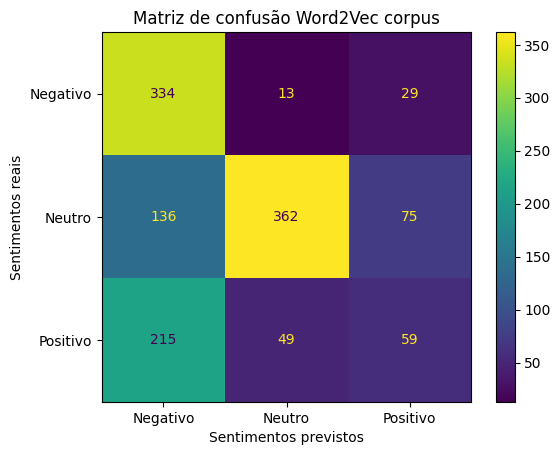

In [15]:
# Criando a matriz e definindo nomes para colunas
cm_corpus = ConfusionMatrixDisplay(confusion_matrix_corpus, display_labels=['Negativo', 'Neutro', 'Positivo'])
cm_corpus.plot()
cm_corpus.ax_.set(
                title='Matriz de confusão Word2Vec corpus', 
                xlabel='Sentimentos previstos', 
                ylabel='Sentimentos reais')
plt.show()

## Naive Bayes com o word2vec utilizando vetores pré-treinados


Nesta etapa iremos utilizar o corpus que já veio vetorizado do site da NILC. 

In [16]:
# Abrindo o dataframe 
df_cbow = pd.read_csv('../output/word2vec_cbow.csv', index_col=0)

In [17]:
# Removendo NaN das bases para facilitar o treinamento 
df_cbow_NaN = df_cbow.dropna()
df_cbow_NaN

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.194111,-0.086163,0.150576,-0.034733,-0.066786,0.122470,0.027893,0.064956,0.005728,0.135925,...,0.046650,-0.142142,0.131115,0.063196,0.025213,0.094671,-0.001749,-0.002428,0.263365,1
['sim'],0.109873,-0.062076,0.187268,-0.213734,0.046350,0.118452,-0.025577,-0.149704,0.143837,0.184814,...,0.031963,-0.051879,0.235329,-0.005905,0.000182,-0.029570,-0.064395,-0.025853,0.185357,0
"['queria', 'saber', 'banking', 'própria']",0.121342,-0.183903,0.268051,-0.031265,0.003071,0.199323,-0.008417,0.046410,0.046311,0.069435,...,0.029866,-0.076881,0.146361,0.077992,-0.022279,0.108679,-0.068519,-0.027490,0.130485,1
"['palmas', 'palmas', 'palmas', 'palmas']",0.215186,-0.092701,0.254579,-0.083714,0.099877,0.371233,0.050387,-0.127568,0.118620,0.129699,...,-0.090724,0.021903,0.221911,0.072890,0.119573,-0.004307,-0.091760,0.027266,0.144531,0
"['vamos', 'ajudar', 'brasil', 'principal', 'categoria', 'automobilismo']",0.208002,-0.119283,0.219406,-0.040021,0.008186,0.211272,0.019965,0.025391,0.058953,0.116330,...,-0.018090,-0.062190,0.159715,0.074844,0.002553,0.096084,-0.036452,0.003484,0.147662,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.156762,-0.134906,0.226852,-0.045667,0.064145,0.179836,0.001532,-0.080106,-0.059974,0.147371,...,-0.077624,0.021257,0.139206,0.068294,0.009093,0.062578,-0.032271,-0.032976,0.160159,1
"['porque', 'brg', 'tá', 'diminuído', 'limite', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.166784,-0.125591,0.187974,-0.061618,0.001240,0.180365,0.004502,0.012454,0.067296,0.108079,...,0.006491,-0.059519,0.148439,0.087409,0.034425,0.070620,-0.056318,0.015074,0.171040,-1
"['atendam', 'telefone', 'amor', 'deus']",0.136519,-0.113854,0.161438,-0.110917,0.034236,0.139376,0.029379,-0.063767,0.037123,0.126380,...,0.000793,-0.079159,0.139690,0.086531,0.027053,0.063675,-0.031798,0.055869,0.187216,1


#### Label encoding 

O label encoding é feito para permitir com que o modelo interprete os diferentes resultados da váriavel alvo 

In [18]:
le = preprocessing.LabelEncoder()

In [19]:
le.fit(df_cbow_NaN['sentimento'])
df_cbow_NaN['sentimento'] = le.transform(df_cbow_NaN['sentimento'])

### Separando o dataset em treino e teste

In [20]:
target_cbow = df_cbow_NaN['sentimento']

In [21]:
features_cbow = df_cbow_NaN.iloc[:,0:50]
features_cbow

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor41,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.194111,-0.086163,0.150576,-0.034733,-0.066786,0.122470,0.027893,0.064956,0.005728,0.135925,...,-0.161490,0.046650,-0.142142,0.131115,0.063196,0.025213,0.094671,-0.001749,-0.002428,0.263365
['sim'],0.109873,-0.062076,0.187268,-0.213734,0.046350,0.118452,-0.025577,-0.149704,0.143837,0.184814,...,-0.314112,0.031963,-0.051879,0.235329,-0.005905,0.000182,-0.029570,-0.064395,-0.025853,0.185357
"['queria', 'saber', 'banking', 'própria']",0.121342,-0.183903,0.268051,-0.031265,0.003071,0.199323,-0.008417,0.046410,0.046311,0.069435,...,-0.207068,0.029866,-0.076881,0.146361,0.077992,-0.022279,0.108679,-0.068519,-0.027490,0.130485
"['palmas', 'palmas', 'palmas', 'palmas']",0.215186,-0.092701,0.254579,-0.083714,0.099877,0.371233,0.050387,-0.127568,0.118620,0.129699,...,-0.310632,-0.090724,0.021903,0.221911,0.072890,0.119573,-0.004307,-0.091760,0.027266,0.144531
"['vamos', 'ajudar', 'brasil', 'principal', 'categoria', 'automobilismo']",0.208002,-0.119283,0.219406,-0.040021,0.008186,0.211272,0.019965,0.025391,0.058953,0.116330,...,-0.277315,-0.018090,-0.062190,0.159715,0.074844,0.002553,0.096084,-0.036452,0.003484,0.147662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.156762,-0.134906,0.226852,-0.045667,0.064145,0.179836,0.001532,-0.080106,-0.059974,0.147371,...,-0.281259,-0.077624,0.021257,0.139206,0.068294,0.009093,0.062578,-0.032271,-0.032976,0.160159
"['porque', 'brg', 'tá', 'diminuído', 'limite', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.166784,-0.125591,0.187974,-0.061618,0.001240,0.180365,0.004502,0.012454,0.067296,0.108079,...,-0.215160,0.006491,-0.059519,0.148439,0.087409,0.034425,0.070620,-0.056318,0.015074,0.171040
"['atendam', 'telefone', 'amor', 'deus']",0.136519,-0.113854,0.161438,-0.110917,0.034236,0.139376,0.029379,-0.063767,0.037123,0.126380,...,-0.187910,0.000793,-0.079159,0.139690,0.086531,0.027053,0.063675,-0.031798,0.055869,0.187216


In [22]:
X_train, X_test, y_train, y_test = train_test_split(features_cbow, target_cbow, test_size=0.2, random_state=42)


### Avaliação do modelo

In [23]:
# Naive Bayes

clf = GaussianNB()

# Treinando o modelo com os dados de teste 
clf = clf.fit(X_train,y_train.values.ravel())

# Prevendo a resposta do dataset
Y_pred = clf.predict(X_test)

print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.53      0.82      0.65       387
           1       0.78      0.60      0.67       447
           2       0.34      0.22      0.27       300

    accuracy                           0.57      1134
   macro avg       0.55      0.55      0.53      1134
weighted avg       0.58      0.57      0.56      1134



In [24]:
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("A precisão foi de :",format_output) 

A precisão foi de : 57.32%


### Matriz de confusão

A matriz de confusão tem como objetivo, comparar as predições do modelo com o dataset real. De tal forma, nesse problema de multiclassificação é possível ter um panorama geral das respostas e se o modelo tem algum viés ou não.

In [25]:
# Criando uma matriz de confusão 
confusion_matrix_cbow = metrics.confusion_matrix(y_test, Y_pred)

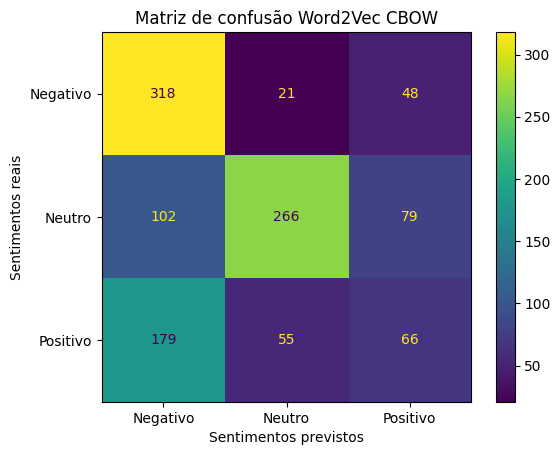

In [26]:
# Criando a matriz e definindo nomes para colunas
cm_cbow = ConfusionMatrixDisplay(confusion_matrix_cbow, display_labels=['Negativo', 'Neutro', 'Positivo'])
cm_cbow.plot()
cm_cbow.ax_.set(
                title='Matriz de confusão Word2Vec CBOW', 
                xlabel='Sentimentos previstos', 
                ylabel='Sentimentos reais')
plt.show()